In [167]:
from selenium import webdriver
from time import sleep
import numpy as np
import re
import pickle

# Input: keyWord: String, location: String, numberOfPages: Int
def scrapeGlassdoor(keyWord, place, numberOfPages, data):
    jobDict = data
    link = []
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument("--test-type")
    
    browser = webdriver.Chrome(chrome_options=options)
    browser.get("https://www.glassdoor.com/index.htm")
    
    job = browser.find_element_by_id("KeywordSearch")
    location = browser.find_element_by_id("LocationSearch")
    sleep(1)
    job.send_keys(keyWord)
    sleep(1)
    location.clear()
    location.send_keys(place)
    sleep(1)
    browser.find_element_by_class_name('gd-btn-mkt').click()

    for i in range(numberOfPages):
        jobPostings = browser.find_elements_by_class_name('jl')
        jobTuple = map(lambda job: (job.get_attribute('data-id'), job), jobPostings)
        newPost = list(filter(lambda job: job[0] not in jobDict.keys(), jobTuple))
        jobData = list(map(lambda job: (job[0], job[1].text.split('\n')), newPost))
        jobData = list(map(lambda job: clean(job), newPost))
        jobDict.update(dict((job[0], job[1]) for job in jobData)) 
        links = list(map(lambda c: (c[0],c[1].find_element_by_tag_name('a').get_attribute('href')), newPost))
        link += links
        browser.find_element_by_class_name('next').click()
        try:
            browser.find_element_by_xpath('//*[@id="JAModal"]/div/div[2]/div').click()
        except:
            pass
    for i in range(len(link)):
        ids = link[i][0]
        browser.get(link[i][1])
        try:
            description = browser.find_element_by_xpath('//*[@id="JobDescriptionContainer"]/div[1]').text
            jobDict[ids].append(description)
        except: 
            pass
        sleep(2)
    return jobDict, link

def clean(job):
    # ('3052194165', ['4.7', 'Data Science Intern', 'iRobot – Bedford, MA', '19 days ago'])
    if len(job) !=0:
        tmp = job[1].text
        raw_rating = re.findall('\d\.\d',tmp )
        if len(raw_rating)==1:
            rating =raw_rating[0]
        else:
            rating = ''
        #print('Rating = ', rating)
        
        raw_sal_range = re.findall('\d+k',tmp )
        if len(raw_sal_range)==2:
            sal_low = int(raw_sal_range[0].replace('k',''))
            sal_high = int(raw_sal_range[1].replace('k',''))
        else:
            sal_low = np.nan
            sal_high = np.nan
        #print('Salary Range= ',raw_sal_range, sal_low, sal_high)
        
        raw_company = re.findall('.+–.+,.+',tmp)
        if len(raw_company)==1:
            tt = raw_company[0].split('–')
            company = tt[0].strip()
            job_city = tt[1].split(',')[0].strip()
            job_state_code = tt[1].split(',')[1].strip()
        else:
            company = ''
            job_city = ''
            job_state_code = ''
        #print('Company = ', raw_company, company, job_city, job_state_code)    
            
        raw_position = re.findall('(.+sci.+|.+ana.+|.+eng.+)',tmp.lower())
        #print('raw_position = ',raw_position)
        if len(raw_position)==1:
            position = raw_position[0]
        else:
            position = tmp.split('\n')[1].lower()
        return (job[0],[rating, position, company, job_city, job_state_code, sal_low, sal_high])




In [212]:
jobTitle = 'Business Analyst'

with open(jobTitle + '.pkl', 'rb') as f:
    data = pickle.load(f)
# print(len(data))
# for job in data:
#     print(data[job])

jobDict, link = scrapeGlassdoor(jobTitle, 'Massachusetts', 16, data)
with open(jobTitle + '.pkl', 'wb') as f:
    pickle.dump(jobDict, f, pickle.HIGHEST_PROTOCOL)

In [218]:
with open(jobTitle + '.pkl', 'rb') as f:
    data = pickle.load(f)
print(len(data))
ls = []
for i in data:
    if len(data[i]) != 8:
        ls.append(str(i))
for i in ls:
    del data[i]
print(len(data))
with open(jobTitle + '.pkl', 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

1272
1272


In [214]:
with open("Software Engineer" + '.pkl', 'rb') as f:
    se = pickle.load(f)
with open("Data Science" + '.pkl', 'rb') as f:
    ds = pickle.load(f)
with open("Marketing" + '.pkl', 'rb') as f:
    m = pickle.load(f)
with open("Electrical Engineering" + '.pkl', 'rb') as f:
    ee = pickle.load(f)
with open("Business Analyst" + '.pkl', 'rb') as f:
    ba = pickle.load(f)

print("Software Engineering: ", len(se))
print("Data Science: ", len(ds))
print("Marketing: ", len(m))
print("Electrical Engineering: ", len(ee))
print("Business Analyst: ", len(ba))

Software Engineering:  1162
Data Science:  1188
Marketing:  1181
Electrical Engineering:  1130
Business Analyst:  1272


In [240]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
df_se = pd.DataFrame(se)
df_se = df_se.transpose()
df_se.columns = ['Rating', 'Job Title', 'Company Name', 'City', 'State', 'Low Salary', 'High Salary', 'Description']
df_se.replace('', np.nan, inplace=True) 
display(df_se.head())

df_ds = pd.DataFrame(ds)
df_ds = df_ds.transpose()
df_ds.columns = ['Rating', 'Job Title', 'Company Name', 'City', 'State', 'Low Salary', 'High Salary', 'Description']
df_ds.replace('', np.nan, inplace=True) 
display(df_ds.head())

df_m = pd.DataFrame(m)
df_m = df_m.transpose()
df_m.columns = ['Rating', 'Job Title', 'Company Name', 'City', 'State', 'Low Salary', 'High Salary', 'Description']
df_m.replace('', np.nan, inplace=True) 
display(df_m.head())

df_ee = pd.DataFrame(ee)
df_ee = df_ee.transpose()
df_ee.columns = ['Rating', 'Job Title', 'Company Name', 'City', 'State', 'Low Salary', 'High Salary', 'Description']
df_ee.replace('', np.nan, inplace=True) 
display(df_ee.head())

df_ba = pd.DataFrame(ba)
df_ba = df_ba.transpose()
df_ba.columns = ['Rating', 'Job Title', 'Company Name', 'City', 'State', 'Low Salary', 'High Salary', 'Description']
df_ba.replace('', np.nan, inplace=True) 
display(df_ba.head())


,Rating,Job Title,Company Name,City,State,Low Salary,High Salary,Description
1059546250,4.7,software engineer - growth,"Quora, Inc.",Mountain View,CA,119.0,189.0,Quora's mission is to share and grow the world...
1069013978,4.4,software engineer,Thumbtack,San Francisco,CA,135.0,214.0,Have you ever tried to hire a plumber? How abo...
1071611808,NaN,software engineers,SoftPath Systems,New York,NY,75.0,123.0,Job\nId:\nSE\nJob\nTitle:\nSoftware Engineer (...
1213694717,NaN,software engineer,NoshList,San Francisco,CA,NaN,NaN,"A solid foundation in computer science, with s..."
1293778897,5.0,front-end software engineer,DropThought,Santa Clara,CA,73.0,120.0,Front-End Software Engineer\n\nAs a Front-End ...


,Rating,Job Title,Company Name,City,State,Low Salary,High Salary,Description
1156693663,3.8,data science - research,Oscar Insurance,New York,NY,NaN,NaN,"As an insurer, we have unique insight into the..."
1413600193,3.8,part time data science instructor,General Assembly,Santa Monica,CA,NaN,NaN,"Since 2011, General Assembly has transformed t..."
1413602118,3.8,part time data science instructor,General Assembly,Boston,MA,NaN,NaN,"Since 2011, General Assembly has transformed t..."
1518282148,NaN,data scientist,Rockstar New York,New York,NY,NaN,NaN,Rockstar Games is seeking an experienced data ...
1594482236,2.8,data scientist,TechUSA,New York,NY,NaN,NaN,The real-world problems they are going to solv...


,Rating,Job Title,Company Name,City,State,Low Salary,High Salary,Description
1355973845,3.5,marketing coordinator,NetCom Learning,New York,NY,38.0,56.0,a {\ncolor: #0d81ce;\n}\n\nPosition Overview:\...
1542182709,3.3,digital marketing specialist,Deltak,Hoboken,NJ,51.0,79.0,Requisition Number 15-0107\nPost Date 7/28/201...
1581971848,2.5,sales and marketing assistant,Hampton Forge,New York,NY,NaN,NaN,Position Summary\n\nReporting to the Sales and...
1663874587,2.8,marketing assistant || marketing associate: im...,Pan Atlantic,New York,NY,NaN,NaN,Marketing Assistant || Marketing Trainee: Imme...
1669855231,NaN,"tlc marketing – new york, ny",TLC Marketing,New York,NY,33.0,61.0,Do you want to be part of an exciting & dynami...


,Rating,Job Title,Company Name,City,State,Low Salary,High Salary,Description
1392137909,NaN,"mehandes engineering – new york, ny",Mehandes Engineering,New York,NY,NaN,NaN,Job Description:\nElectrical engineering and\n...
1546363820,NaN,electrical engineer - forensics - pe required,Engineering Search Partners,New York,NY,NaN,NaN,Engineering Search Partners is Recruiting on P...
1561496156,2.9,software engineer,Synactive,Foster City,CA,73.0,119.0,Software Engineer\n\nKey Roles & Responsibilit...
1605756399,5.0,electrical engineer,Solar Design & Drafting,Petaluma,CA,NaN,NaN,"As you can see from SD&D's profile, we are a y..."
1915701650,2.9,"engineer, algorithms",Knowles Intelligent Audio,Mountain View,CA,NaN,NaN,"Founded in 1946, Knowles Corporation (NYSE: KN..."


,Rating,Job Title,Company Name,City,State,Low Salary,High Salary,Description
1071611702,NaN,business analyst,SoftPath Systems,New York,NY,63.0,95.0,Men's Denver Broncos Nike Navy Gold Collection...
1134040321,3.3,business analyst,Finezi,Union City,CA,68.0,108.0,Careers\nSenior Business Analyst\n\n\nSkills:\...
1240862708,3.3,senior business analyst,PROLIM,Jersey City,NJ,84.0,134.0,Description:\n\nPROLIM\nGlobal Corporation (ww...
1585626305,3.3,business analyst,PROLIM,Hawthorne,CA,49.0,81.0,Description:\n\nPROLIM Global Corporation (www...
1671049418,3.7,senior analyst revenue management systems,JetBlue,Long Island City,NY,89.0,137.0,Position Expectations\n\nPosition Summary\nThe...


# Ratings

In [229]:
print("Software Engineer: ", round(pd.to_numeric(df_se['Rating']).mean(), 2))
print("Data Science: ", round(pd.to_numeric(df_ds['Rating']).mean(), 2))
print("Marketing: ", round(pd.to_numeric(df_m['Rating']).mean(), 2))
print("Electrial Engineer: ", round(pd.to_numeric(df_ee['Rating']).mean(), 2))
print("Business Analyst: ", round(pd.to_numeric(df_ba['Rating']).mean(), 2))


Software Engineer:  3.99
Data Science:  3.92
Marketing:  3.93
Electrial Engineer:  3.76
Business Analyst:  3.8


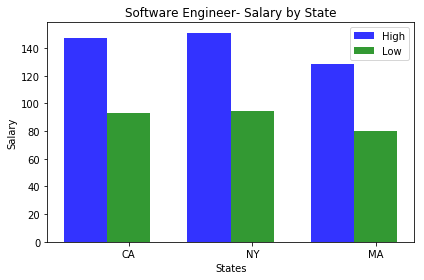

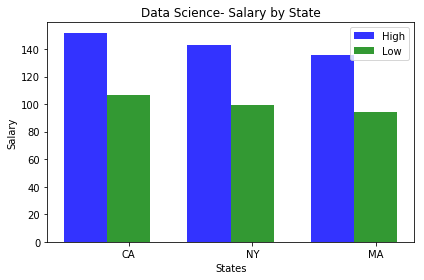

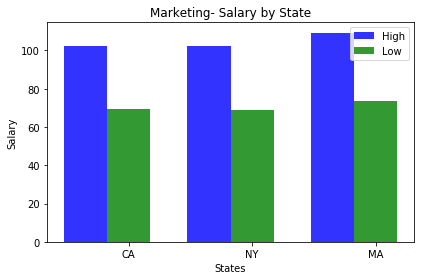

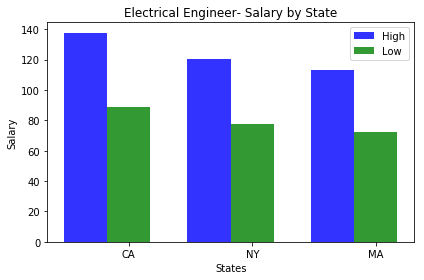

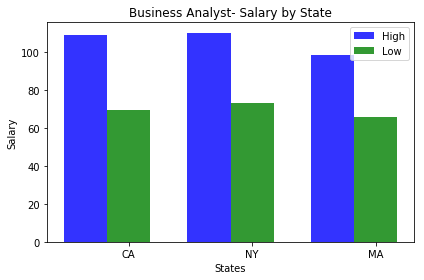

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# create plot
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.8

for df in [(df_se, "Software Engineer"), (df_ds, "Data Science"), (df_m,"Marketing"), (df_ee, "Electrical Engineer"), (df_ba, "Business Analyst")]:
    high = (df[0][df[0]['State'] == 'CA']['High Salary'].mean(),
            df[0][df[0]['State'] == 'NY']['High Salary'].mean(),
            df[0][df[0]['State'] == 'MA']['High Salary'].mean())
    low = (df[0][df[0]['State'] == 'CA']['Low Salary'].mean(),
           df[0][df[0]['State'] == 'NY']['Low Salary'].mean(),
           df[0][df[0]['State'] == 'MA']['Low Salary'].mean())
    rects1 = plt.bar(index, high, bar_width,
                     alpha=opacity,
                     color='b',
                     label='High')

    rects2 = plt.bar(index + bar_width, low, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Low')

    plt.xlabel('States')
    plt.ylabel('Salary')
    plt.title(df[1] + '- Salary by State')
    plt.xticks(index + bar_width, ('CA', 'NY', 'MA'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [161]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
description = list(df['Description'])
description = [x.replace('\n', ' ').replace('\r', '') for x in description]
word_tokens = word_tokenize(str(description).lower())
filtered_description = [w for w in word_tokens if not w in stop_words] 

print(len(filtered_description))

347070


In [162]:
import collections

cnt = Counter()

filtered_description = [w for w in filtered_description if not w in [',', '.', '(', ')', ':', ';', '-', '&', '’', '``']] 

for word in filtered_description:
    cnt[word] +=1
    
for i in cnt.most_common(len(cnt)):
    print(i)

('data', 7635)
('experience', 3848)
('science', 2559)
('team', 2365)
('work', 2161)
('business', 2071)
('learning', 1532)
('skills', 1378)
('analytics', 1350)
('product', 1336)
('machine', 1121)
('ability', 1085)
('engineering', 1076)
('new', 1075)
('analysis', 985)
('working', 978)
('years', 945)
('development', 943)
('research', 923)
('solutions', 919)
('strong', 915)
('management', 901)
('company', 891)
("'s", 825)
('develop', 819)
('teams', 784)
('tools', 781)
('software', 780)
('including', 769)
('technology', 749)
('technical', 733)
('help', 730)
('knowledge', 720)
('design', 711)
('environment', 707)
('across', 693)
('systems', 685)
('support', 683)
('build', 683)
('opportunity', 679)
('using', 660)
('models', 656)
('problems', 653)
('people', 646)
('python', 641)
('role', 631)
('jobs', 629)
('products', 628)
('customer', 617)
('degree', 617)
('projects', 614)
('us', 607)
('computer', 605)
('world', 603)
('job', 583)
('information', 579)
('required', 574)
('statistical', 569)
('

('st', 21)
('westfield', 21)
('preparing', 20)
('nearly', 20)
('machines', 20)
('attribution', 20)
('achieving', 20)
('anyone', 20)
('mit', 20)
('placement', 20)
('fintech', 20)
('enjoys', 20)
('html', 20)
('question', 20)
('trade', 20)
('dollar', 20)
('awareness', 20)
('however', 20)
('award', 20)
('powers', 20)
('five', 20)
('automating', 20)
('whole', 20)
('update', 20)
('canada', 20)
('administrative', 20)
('best-in-class', 20)
('pattern', 20)
('hbase', 20)
('he/she', 20)
('construct', 20)
('iterating', 20)
('fulfillment', 20)
('flights', 20)
('pushing', 20)
('card', 20)
('25', 20)
('recruit', 20)
('troubleshoot', 20)
('stata', 20)
('addressing', 20)
('remain', 20)
('align', 20)
('found', 20)
('detect', 20)
('extend', 20)
('yes', 20)
('sensors', 20)
('developments', 20)
('assumptions', 20)
('affordable', 20)
('talk', 20)
('discussions', 20)
('chicago', 20)
('rewards', 20)
('shaping', 20)
('childbirth', 20)
('checks', 20)
('liaison', 20)
('poster', 20)
('id', 20)
('initial', 20)
('g

('vertical', 11)
('guided', 11)
('outcome', 11)
('spatial', 11)
('enormous', 11)
('airfare', 11)
('aimed', 11)
('charts', 11)
('mile', 11)
('commute', 11)
('reviewed', 11)
('evaluations', 11)
('possibilities', 11)
('end-user', 11)
('predicting', 11)
('accessing', 11)
('specification', 11)
('prioritized', 11)
('programmatic', 11)
('funnel', 11)
('humble', 11)
('outlook', 11)
('soon', 11)
('spans', 11)
('profiles', 11)
('walk', 11)
('storefront', 11)
('allocation', 11)
('stability', 11)
('broadly', 11)
('informal', 11)
('sage', 11)
('inspection', 11)
('represents', 11)
('scaled', 11)
('250', 11)
('browser', 11)
('mastery', 11)
('client-facing', 11)
('attract', 11)
('original', 11)
('expansion', 11)
('prepared', 11)
('journal', 11)
('anomalies', 11)
('total', 11)
('medication', 11)
('progression', 11)
('accurately', 11)
('references', 11)
('structuring', 11)
('coming', 11)
('therapy', 11)
('recently', 11)
('helpful', 11)
('ubers', 11)
('sit', 11)
('chemistry', 11)
('fact', 11)
('samples',

('weaknesses', 6)
('self-development', 6)
('responds', 6)
('fast-changing', 6)
('reimagining', 6)
('severe', 6)
('behave', 6)
('drop', 6)
('chemical', 6)
('century', 6)
('digitized', 6)
('intelligently', 6)
('therefore', 6)
('electronics', 6)
('alliance', 6)
('premise', 6)
('relay', 6)
('instead', 6)
('flywire', 6)
('barriers', 6)
('samsung', 6)
('produces', 6)
('drug-free', 6)
('ds', 6)
('bike', 6)
('ok', 6)
('plants', 6)
('utilized', 6)
('evidenced', 6)
('concentration', 6)
('grad', 6)
('fueling', 6)
('strict', 6)
('go-to', 6)
('snapchat', 6)
('here\\', 6)
('kiva', 6)
('loan', 6)
('portland', 6)
('embody', 6)
('choosing', 6)
('benchmarks', 6)
('jones', 6)
('harvesting', 6)
('facets', 6)
('experimenting', 6)
('toolkits', 6)
('nets', 6)
('packaging', 6)
('e-verify', 6)
('avenues', 6)
('deemed', 6)
('young', 6)
('data-informed', 6)
('vague', 6)
('minorities/women/protected', 6)
('hyper-growth', 6)
('cross-team', 6)
('offshore', 6)
('sale', 6)
('included', 6)
('satisfy', 6)
('econometric

('extrapolate', 4)
('revealed', 4)
('pivoting', 4)
('practically', 4)
('evangelizes', 4)
('inspecting', 4)
('customer-level', 4)
('gap', 4)
('exceptions', 4)
('discretionary', 4)
('currencies', 4)
('attributed', 4)
('assure', 4)
('preempt', 4)
('resolves', 4)
('construed', 4)
('periods', 4)
('behaviour', 4)
('analyse', 4)
('pick', 4)
('speech', 4)
('inventive', 4)
('conclusion', 4)
('installation', 4)
('fpso', 4)
('stake', 4)
('needing', 4)
('tradecraft', 4)
('280', 4)
('congress', 4)
('science/engineering', 4)
('methodical', 4)
('catalogs', 4)
('web/mobile', 4)
('incremental', 4)
('flume', 4)
('consumed', 4)
('trained', 4)
('possibly', 4)
('headhunters', 4)
('resumes/cvs', 4)
('headhunter', 4)
('oakland', 4)
('polling', 4)
('atmosphere', 4)
('buyer', 4)
('luigi', 4)
('fama', 4)
('selves', 4)
('article', 4)
('enhances', 4)
('pre-built', 4)
('lstm', 4)
('sequence', 4)
('ocr', 4)
('fearless', 4)
('magical', 4)
('orders', 4)
('assesses', 4)
('multitude', 4)
('in-office', 4)
('glimpse', 4)

('reached', 3)
('curate', 3)
('post-bachelor', 3)
('non-structured', 3)
('dssi', 3)
('renowned', 3)
('ranks', 3)
('state-of-art', 3)
('multi-quarter', 3)
('maniacally', 3)
('nuances', 3)
('nonprofit', 3)
('pharmd', 3)
('consists', 3)
('cards', 3)
('out-of-the-box', 3)
('subscribers', 3)
('maximal', 3)
('reinforce', 3)
('elevate', 3)
('15+', 3)
('descriptionthe', 3)
('inner', 3)
('workings', 3)
('managementthe', 3)
('petco', 3)
("'principal", 3)
('solutioning', 3)
('resilience', 3)
('multicultural', 3)
('microbial', 3)
('interoperability', 3)
('flexibly', 3)
('drawn', 3)
('waters', 3)
('general-purpose', 3)
('bias-for-action', 3)
('well-sequenced', 3)
('qlikview', 3)
('jvm', 3)
('injection', 3)
('extracted', 3)
('impressive', 3)
('geek', 3)
('closed', 3)
('arlington', 3)
('adversary', 3)
('ttps', 3)
('geopolitical', 3)
('tac', 3)
('authors', 3)
('graphical', 3)
('mediums', 3)
('operators', 3)
('breaches', 3)
('can-do', 3)
('forth', 3)
('basics', 3)
('artifacts', 3)
('shapes', 3)
('expla

('boulders', 2)
('ride-sharing', 2)
('preset', 2)
('//finchtherapeutics.com/join-finch/', 2)
('shops', 2)
('yearly', 2)
('themes', 2)
("'mba", 2)
('26-sep-2018', 2)
('35916br', 2)
('•an', 2)
('•able', 2)
('•exceptional', 2)
('•a', 2)
('day-in-the-life', 2)
('technical/quantitative', 2)
('crunching', 2)
('dignity', 2)
('browses', 2)
('enjoyable', 2)
('text-based', 2)
('cures', 2)
('autism', 2)
('sorts', 2)
('scars', 2)
('sop', 2)
('stated', 2)
('wildly', 2)
('inter-departmental', 2)
('cooperatively', 2)
('periodically', 2)
('summarizing', 2)
('intrusion', 2)
('compose', 2)
('iac', 2)
('variants', 2)
('grammar', 2)
('readability', 2)
('docs', 2)
('editors', 2)
('high-priority', 2)
('missions', 2)
('underground', 2)
('transnational', 2)
('d.c.', 2)
('nodes', 2)
('bear', 2)
('paired', 2)
('temporal', 2)
('bilingual', 2)
('policyholders', 2)
('workers', 2)
('occupational', 2)
('consequences', 2)
('workloads', 2)
('herein', 2)
("'working", 2)
('icf—together', 2)
('airlines', 2)
('multi-billi

('five-star', 1)
('asthma', 1)
('copd', 1)
('respiratory', 1)
('depression', 1)
('culture-shifting', 1)
('worklists', 1)
('abnormality', 1)
('volumetric', 1)
('pathologies', 1)
('clinician', 1)
('freeing', 1)
('higher-value', 1)
('faulty', 1)
('c/c++/java/go', 1)
('spas', 1)
('apache/nginx', 1)
('granularity', 1)
('timescales', 1)
('updating', 1)
('uberpool', 1)
('frontline', 1)
('nourish', 1)
('10^6', 1)
('10^10', 1)
('best-in-breed', 1)
('collaborated', 1)
('scientist/machine', 1)
('94016', 1)
('mill', 1)
('trails', 1)
('dog-free', 1)
('inclined', 1)
('abnormalities', 1)
('skunkworks', 1)
('s-plus', 1)
('gauss', 1)
("'recruitment", 1)
('12th', 1)
('11th', 1)
('datascience.berkeley.edu', 1)
('renewed', 1)
('one-', 1)
('dissertation', 1)
('postdoc', 1)
('broadly-defined', 1)
('60,000', 1)
('//aprecruit.berkeley.edu/apply/jpf01703', 1)
('optionally', 1)
('arrange', 1)
('referees', 1)
('dossier', 1)
('//apo.berkeley.edu/evalltr.html', 1)
('reapply', 1)
('ischool.berkeley.edu', 1)
('//pol

('daring', 1)
("'by", 1)
('commence', 1)
('takedas', 1)
('patient-focused', 1)
('partly', 1)
('up-to-data', 1)
('competences', 1)
('portray', 1)
('li-jv1', 1)
('sub-type', 1)
('process-oriented', 1)
('super', 1)
('ai/ml/open', 1)
('source/tech', 1)
('revenue/cost', 1)
('ma-', 1)
('18wd30284', 1)
('•currently', 1)
('•pursuing', 1)
('•basic', 1)
('2019–june', 1)
('nutshell', 1)
('human-centered', 1)
('critique', 1)
('designersfrom', 1)
('optimism', 1)
('pause', 1)
('critiquing', 1)
("qa'ing", 1)
('exploited', 1)
('early-phase', 1)
('quantifiable', 1)
('balcony', 1)
('attractiveness', 1)
('subjective', 1)
('physicist', 1)
('partake', 1)
('eye-popping', 1)
('spacemaker.ai', 1)
("'managing", 1)
('responsibilitiestechnical', 1)
('non-required', 1)
('100,000+', 1)
('weighting', 1)
('srs', 1)
('disproportionate', 1)
('non-response', 1)
('calculating', 1)
('load/quantitative', 1)
('logger', 1)
("'consultant–", 1)
('relishes', 1)
('budget-', 1)
('import/process', 1)
('/development', 1)
('bc-d5-0

('psychologist', 1)
('subsequent', 1)
('golang/go', 1)
('skills•experience', 1)
('workable', 1)
('posed', 1)
('15-18', 1)
('create/design', 1)
('customizes', 1)
('moderate-to-high', 1)
('value-driven', 1)
('0-4', 1)
('1-5', 1)
('3-7', 1)
('167,300', 1)
('tech-readiness', 1)
('libertys', 1)
('lm', 1)
('teslas', 1)
('autopilot', 1)
('google/waymos', 1)
('forthcoming', 1)
('technology-forward', 1)
('accidents', 1)
('vin-level', 1)
('telematics-driven', 1)
('usage-based', 1)
('in-source', 1)
('obd2', 1)
('oem-direct', 1)
('adas', 1)
('impending', 1)
('imbedded', 1)
('102,500-', 1)
('errand', 1)
('redesigned', 1)
('replaced', 1)
('estimated', 1)
('arrival', 1)
('single-minded', 1)
('modelization', 1)
('convex', 1)
('combinatorial', 1)
('//www.cnbc.com/2017/07/31/booster-a-fuel-delivery-start-up-used-by-companies-like-facebook.html', 1)
('//techcrunch.com/2017/08/01/booster-raises-20-million-to-fill-your-car-at-work/', 1)
('//www.wsj.com/articles/the-new-corporate-perk-gassing-up-at-work-151

('work-around', 1)
('area-specific', 1)
('process-bottlenecks', 1)
('e-newsletter', 1)
('gradeadm', 1)
('080standard', 1)
('hours36.25eligible', 1)
('overtimenobenefits', 1)
('eligibleyesessential', 1)
('nophysical', 1)
('requirednovalid', 1)
('requiredno', 1)
('60b', 1)
('wreak', 1)
('havoc', 1)
('8.5m', 1)
('accomplice', 1)
('team.you', 1)
('rebooking', 1)
('airspace', 1)
('materially', 1)
('derivative', 1)
('value-at-risk', 1)
('cx', 1)
('munge', 1)
('analysis.you', 1)
('back-of-the-napkin', 1)
('waterfall', 1)
('enthusiasts', 1)
('likes', 1)
('searchmenu', 1)
('employee/retiree', 1)
('merchandise', 1)
('radiusradius5', 1)
('miles15', 1)
('miles25', 1)
('miles35', 1)
('miles50', 1)
('cdg', 1)
('export', 1)
('operations-pilot', 1)
('hr/recruiting', 1)
('it/mis', 1)
('project/program/product', 1)
('retrofit', 1)
('ipc', 1)
('publications-maintenance', 1)
('chain/procurement', 1)
('france', 1)
('hungary', 1)
('italy', 1)
('netherlands', 1)
('poland', 1)
('qatar', 1)
('russia', 1)
('sau